## Sign Language MNIST Dataset

- In this notebook, we will try to build a CNN using the Sign Language MNIST Dataset
- [Data Source](https://www.kaggle.com/datasets/datamunge/sign-language-mnist)

### Read Data

In [1]:
# import libraries to read data and check

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# set up train and validation file paths

TRAINING_FILE = './train.csv'
VALIDATION_FILE = './validation.csv'

In [3]:
# check data

with open(TRAINING_FILE) as training_file:
    line = training_file.readline()
    print('First line : {}'.format(line))
    line = training_file.readline()
    print('Second line : {}'.format(line))

First line : label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,

In [6]:
train_df = pd.read_csv('train.csv')
train_df.head(3)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195


In [143]:
pd.Series(test_df['label'].unique()).sort_values(ascending=False)

23    24
18    23
11    22
5     21
20    20
16    19
17    18
19    17
21    16
13    15
6     14
15    13
9     12
22    11
2     10
8      8
7      7
0      6
1      5
10     4
4      3
12     2
14     1
3      0
dtype: int64

In [142]:
pd.Series(train_df['label'].unique()).sort_values(ascending=False)

14    24
13    23
6     22
12    21
9     20
11    19
7     18
10    17
4     16
18    15
23    14
3     13
16    12
17    11
8     10
5      8
22     7
1      6
21     5
19     4
0      3
2      2
15     1
20     0
dtype: int64

In [7]:
test_df = pd.read_csv('validation.csv')
test_df.head(3)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222


- We can see that first column is the class label
- First row is the column names corresponding to the pixel values in the image and
- Rest all values are the pixel values

### Parse the input files
- Points to Note:
    - First row is the header
    - All rows are pixel values
    - First value in each row is the label
    - We will want to create two numpy arrays 
        - one for the labels 
        - another 28 x 28 shape np array for the pixel values 

In [8]:
import csv

In [80]:
# write a function to parse the image files in the csv
# this will return the labels and images in numpy array format
# the shape of the resulting images and labels will be (27455,) and (27455,28,28) respectively

def parse_data_from_input(filename):
    images = []
    labels = []
    with open(filename, newline='') as data_file:
        file_reader = csv.reader(data_file, delimiter=',')
    #     print(file_reader)

        for row in file_reader:
            labels.append(row[0])
            images.append(row[1:])

    # remove the header part
    labels = np.array(labels)[1:]
    images = np.array(images)[1:]
    
    # change the data type to float
    labels = labels.astype(float)
    images = images.astype(float)

    # reshape the images so that it can be fed to the DNN
    images = images.reshape(images.shape[0], 28, 28)
    
    return images, labels

In [81]:
training_images, training_labels = parse_data_from_input(TRAINING_FILE)
validation_images, validation_labels = parse_data_from_input(VALIDATION_FILE)

print(f"Training images has shape: {training_images.shape} and dtype: {training_images.dtype}")
print(f"Training labels has shape: {training_labels.shape} and dtype: {training_labels.dtype}")
print(f"Validation images has shape: {validation_images.shape} and dtype: {validation_images.dtype}")
print(f"Validation labels has shape: {validation_labels.shape} and dtype: {validation_labels.dtype}")

Training images has shape: (27455, 28, 28) and dtype: float64
Training labels has shape: (27455,) and dtype: float64
Validation images has shape: (7172, 28, 28) and dtype: float64
Validation labels has shape: (7172,) and dtype: float64


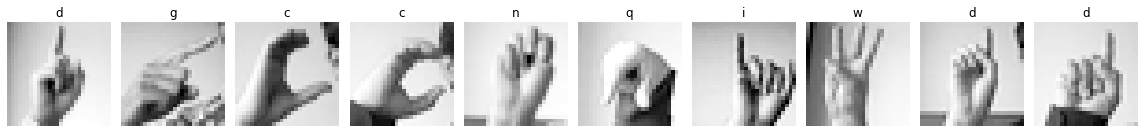

In [85]:
## Visualizing the images
import string
from tensorflow.keras.utils import array_to_img

# Plot a sample of 10 images from the training set
def plot_categories(training_images, training_labels):
    fig, axes = plt.subplots(1, 10, figsize=(16, 15))
    axes = axes.flatten()
    letters = list(string.ascii_lowercase)

    for k in range(10):
        img = training_images[k]
        img = np.expand_dims(img, axis=-1)
        img = array_to_img(img)
        ax = axes[k]
        ax.imshow(img, cmap="Greys_r")
        ax.set_title(f"{letters[int(training_labels[k])]}")
        ax.set_axis_off()

    plt.tight_layout()
    plt.show()

plot_categories(training_images, training_labels)

## Create Image Generators

In [86]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

- Note, we will need to add the dimension to the image for the color channel
- Since this is a greyscale image, it will be 1

In [166]:
## function to create image generators

def train_val_generators(training_images, training_labels, validation_images, validation_labels):
    
    # add the extra dimension to the images data
    training_images = np.expand_dims(training_images, 3)
    validation_images = np.expand_dims(validation_images, 3)
    
    # create generators
    train_gen = ImageDataGenerator(rotation_range=40,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.1,
                                   #zoom_range=0.2,
                                   horizontal_flip=False,
                                   vertical_flip=False,
                                   rescale=1.0/255.0)
    
    training_generator = train_gen.flow(training_images,
                                        training_labels,
                                        batch_size=32)
    
    # create generators - validation
    validation_gen = ImageDataGenerator(rescale=1.0/255.0)
    
    validation_generator = validation_gen.flow(validation_images,
                                    validation_labels,
                                    batch_size=32)  
    
    return training_generator, validation_generator

In [167]:
# Test your generators
train_generator, validation_generator = train_val_generators(training_images, training_labels, validation_images, validation_labels)

print(f"Images of training generator have shape: {train_generator.x.shape}")
print(f"Labels of training generator have shape: {train_generator.y.shape}")
print(f"Images of validation generator have shape: {validation_generator.x.shape}")
print(f"Labels of validation generator have shape: {validation_generator.y.shape}")

Images of training generator have shape: (27455, 28, 28, 1)
Labels of training generator have shape: (27455,)
Images of validation generator have shape: (7172, 28, 28, 1)
Labels of validation generator have shape: (7172,)


## Create Model

In [104]:
import tensorflow as tf
import tensorflow.keras as keras

In [146]:
# check training and validation labels unique values
pd.Series(training_labels).nunique()

24

In [147]:
pd.Series(validation_labels).nunique()

24

In [168]:
def create_model():
    model = keras.models.Sequential([

        keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(28, 28, 1)),
        keras.layers.MaxPool2D(pool_size=(2,2)),

        keras.layers.Conv2D(256, (3,3), activation='relu'),
        keras.layers.MaxPool2D(pool_size=(2,2)),

        keras.layers.Flatten(),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(512, activation='relu'),
        keras.layers.Dense(25, activation='softmax')
    ])

    # compile model
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), #'sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [169]:
# create model

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 13, 13, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 256)       295168    
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 5, 256)        0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 6400)              0         
                                                                 
 dropout_5 (Dropout)         (None, 6400)             

In [170]:
model = create_model()

In [171]:
# fit the model

model.fit(train_generator, 
          epochs=15, 
          validation_data=validation_generator)

Epoch 1/15
858/858 [==============================] - 79s 92ms/step - loss: 1.5662 - accuracy: 0.5061 - val_loss: 0.4995 - val_accuracy: 0.8179
Epoch 2/15
858/858 [==============================] - 80s 93ms/step - loss: 0.5748 - accuracy: 0.8102 - val_loss: 0.2079 - val_accuracy: 0.9359
Epoch 3/15
858/858 [==============================] - 84s 97ms/step - loss: 0.3236 - accuracy: 0.8930 - val_loss: 0.1413 - val_accuracy: 0.9430
Epoch 4/15
858/858 [==============================] - 81s 95ms/step - loss: 0.2215 - accuracy: 0.9264 - val_loss: 0.0746 - val_accuracy: 0.9780
Epoch 5/15
858/858 [==============================] - 80s 93ms/step - loss: 0.1610 - accuracy: 0.9480 - val_loss: 0.0449 - val_accuracy: 0.9848
Epoch 6/15
858/858 [==============================] - 83s 96ms/step - loss: 0.1273 - accuracy: 0.9575 - val_loss: 0.0765 - val_accuracy: 0.9696
Epoch 7/15
858/858 [==============================] - 86s 101ms/step - loss: 0.1124 - accuracy: 0.9624 - val_loss: 0.0450 - val_accuracy

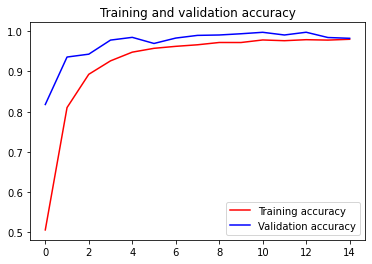

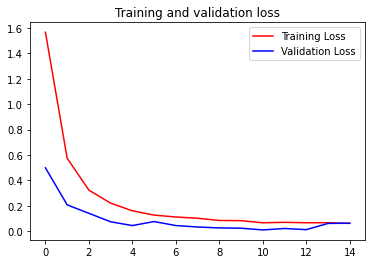

In [172]:
# Plot the chart for accuracy and loss on both training and validation
acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()